# Naive Bayes

Objective: Predict concrete strength   
Dataset: concrete.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('concrete.csv')
print(data.shape)
data.head()

(1030, 9)


,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0


In [2]:
data.describe()

,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,0.142718
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,0.349955
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,0.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,0.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,0.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,0.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,1.000000


## Data Exploration

0    883
1    147
Name: Strength, dtype: int64


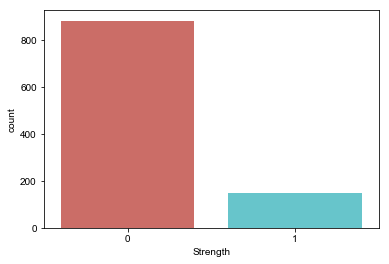

In [3]:
print(data['Strength'].value_counts())  #1-over 55, 0-lower 55

sns.countplot(x='Strength',data = data, palette='hls',order = data['Strength'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

## Correlation

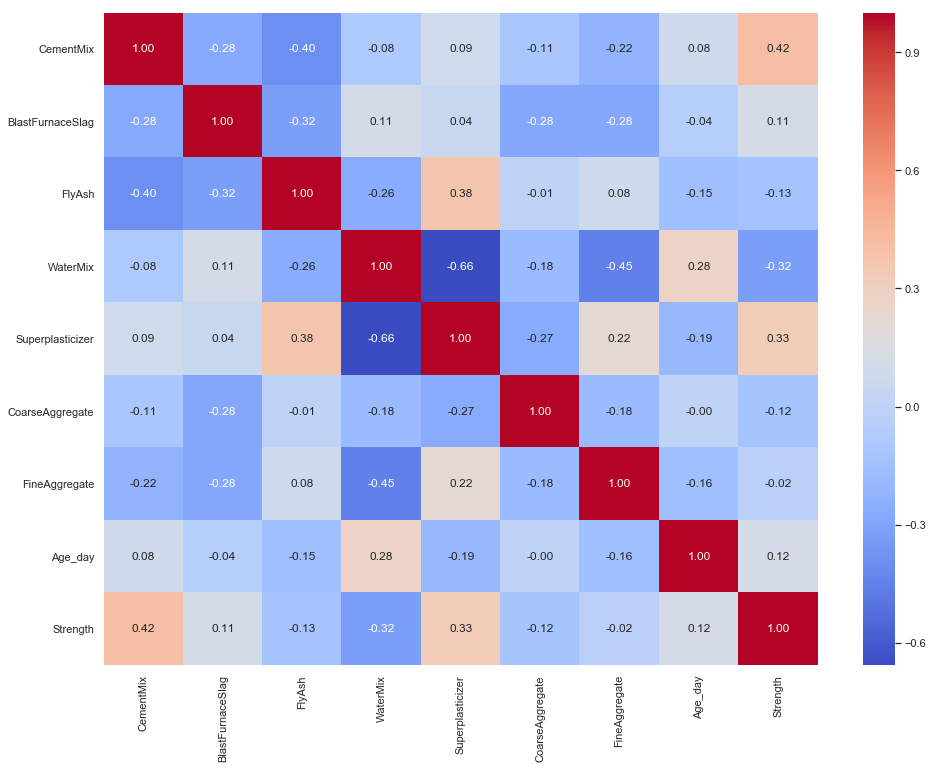

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [5]:
corr_rank = data.corr()
corr_rank["Strength"].sort_values(ascending=False)

Strength            1.000000
CementMix           0.416056
Superplasticizer    0.326754
Age_day             0.116392
BlastFurnaceSlag    0.107340
FineAggregate      -0.024011
CoarseAggregate    -0.123184
FlyAsh             -0.131634
WaterMix           -0.321388
Name: Strength, dtype: float64

## Data Processing and Selection

In [6]:
X = data.iloc[:, :-1] #from 1st variable until 2nd last var
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1030, 8)


,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [7]:
y = data["Strength"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (1030,)


0    1
1    1
2    0
3    0
4    0
Name: Strength, dtype: int64

## Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (1030, 8)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


array([[ 2.47791487, -0.85688789, -0.84714393, -0.91676439, -0.62044832,
         0.86315424, -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, -0.91676439, -0.62044832,
         1.05616419, -1.21767004, -0.27973311]])

## Split Train Test

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (824, 8) (824,)
X TEST Set :  (206, 8) (206,)


## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nbayes = GaussianNB()
nbayes.fit(X_train,y_train)

y_pred = nbayes.predict(X_test)
nbayes.score(X_train,y_train)

print('Naive Bayes Accuracy Score:', round(metrics.accuracy_score(y_test,y_pred),4))

Naive Bayes Accuracy Score: 0.8447


## Test Prediction

In [11]:
df_pred1 = data[data.index == 1]
df_pred2 = data[data.index == 2]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,CementMix,BlastFurnaceSlag,FlyAsh,WaterMix,Superplasticizer,CoarseAggregate,FineAggregate,Age_day,Strength
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0


In [12]:
Xp = df_pred.iloc[:, :-1]
yp = df_pred["Strength"]
Xp = scaler.transform(Xp)

pred = nbayes.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 0], dtype=int64)